In [51]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

    
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

import warnings
warnings.filterwarnings("ignore");

RAND = 10

In [52]:
df = pd.read_csv("train.csv")

df

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [53]:
print(f'Train size = {df.shape}')

Train size = (73799, 19)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [55]:
df.education.isna().sum() / df.shape[0] * 100

0.41599479667746175

In [56]:
df.education.unique()

array(['SCH', 'GRD', 'UGR', 'PGR', 'ACD', nan], dtype=object)

In [57]:
ed_mode = df.education.mode()[0]
df.education = df.education.fillna(ed_mode)

In [58]:
df.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [59]:
df.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [60]:
df.home_address.unique()

array([1, 2, 3], dtype=int64)

In [61]:
df[['home_address','work_address']] = df[['home_address','work_address']].astype(object)

In [62]:
df.describe(include = object)

,app_date,education,sex,car,car_type,home_address,work_address,foreign_passport
count,73799,73799,73799,73799,73799,73799,73799,73799
unique,120,5,2,2,2,3,3,2
top,18MAR2014,SCH,F,N,N,2,3,N
freq,1018,39167,41562,49832,59791,39956,44959,62733


(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

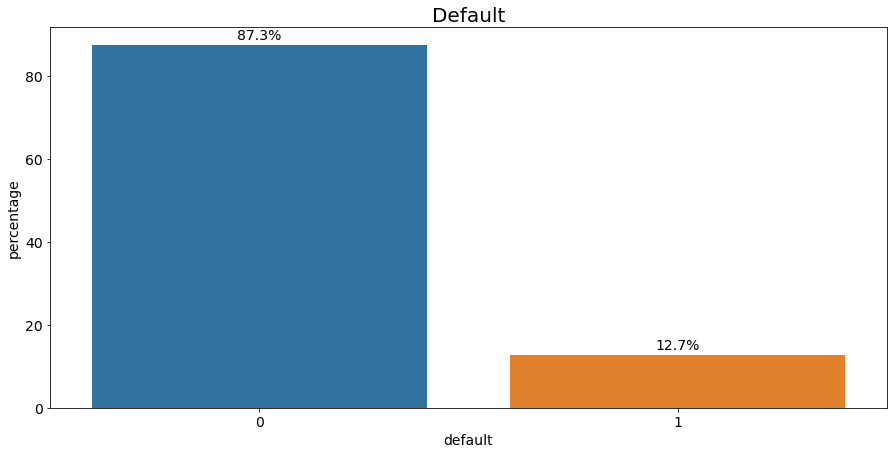

In [63]:
norm_target = (df
               .default
               .value_counts(normalize = True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize = (15, 7))
ax = sns.barplot(x = 'index',y = 'percent',data = norm_target)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,
               (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0,10),
                textcoords = 'offset points',
                fontsize = 14)

plt.title('Default', fontsize = 20)

plt.xlabel('default', fontsize = 14)
plt.ylabel('percentage', fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)


(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
        0.045]),
 [Text(0, 0.0, '0.000'),
  Text(0, 0.005, '0.005'),
  Text(0, 0.01, '0.010'),
  Text(0, 0.015, '0.015'),
  Text(0, 0.02, '0.020'),
  Text(0, 0.025, '0.025'),
  Text(0, 0.03, '0.030'),
  Text(0, 0.035, '0.035'),
  Text(0, 0.04, '0.040'),
  Text(0, 0.045, '0.045')])

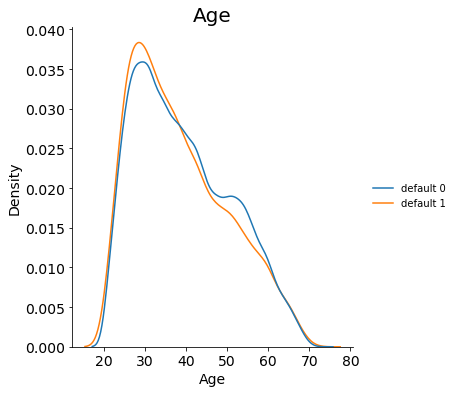

In [64]:
sns.displot(
    {
        "default 0": df[df.default == 0].age,
        "default 1": df[df.default == 1].age,
    },
    kind = "kde",
    common_norm = False
)


plt.title('Age', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [65]:
df.groupby('default')['age'].median()

default
0    38.0
1    36.0
Name: age, dtype: float64

In [66]:
df.groupby('default')['age'].mean()

default
0    39.390504
1    38.525395
Name: age, dtype: float64

In [67]:
df.groupby('default')['age'].apply(lambda x: x.value_counts().index[0]).reset_index()

,default,age
0,0,31
1,1,26


(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.01, '0.01'),
  Text(0, 0.02, '0.02'),
  Text(0, 0.03, '0.03'),
  Text(0, 0.04, '0.04'),
  Text(0, 0.05, '0.05')])

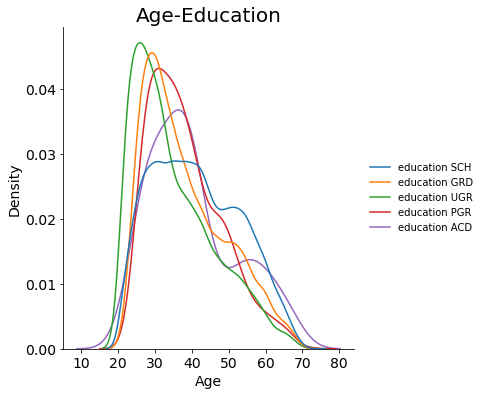

In [68]:
sns.displot(
    {
        "education SCH": df[df.education == 'SCH'].age,
        "education GRD": df[df.education == 'GRD'].age,
        "education UGR": df[df.education == 'UGR'].age,
        "education PGR": df[df.education == 'PGR'].age,
        "education ACD": df[df.education == 'ACD'].age,
    
    },
    kind = "kde",
    common_norm = False
)



plt.title('Age-Education', fontsize = 20)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Density', fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

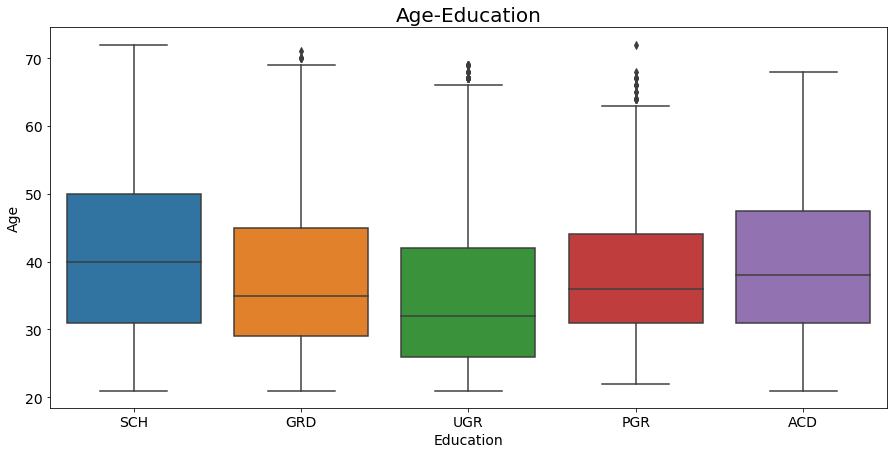

In [69]:
plt.figure(figsize = (15, 7))

sns.boxplot(x = 'education',y = 'age', data = df)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

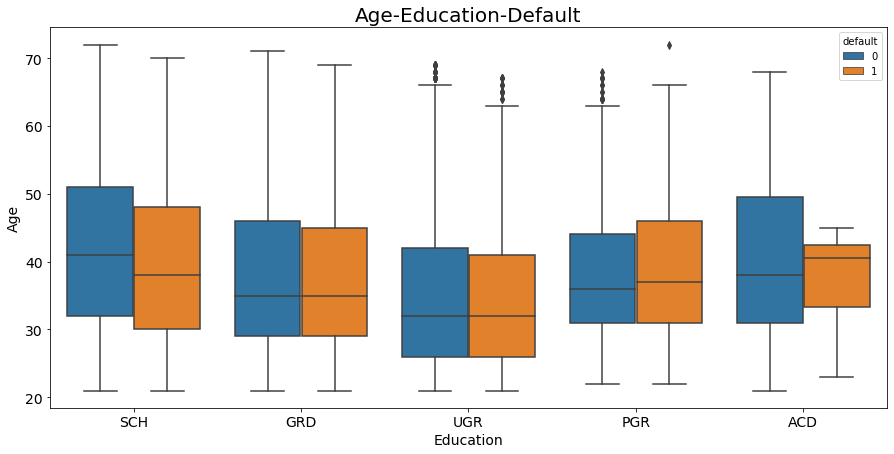

In [70]:
plt.figure(figsize = (15, 7))

sns.boxplot(x='education', y='age', hue='default', data=df)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

In [71]:
df.groupby('education')['age'].median()

education
ACD    38.0
GRD    35.0
PGR    36.0
SCH    40.0
UGR    32.0
Name: age, dtype: float64

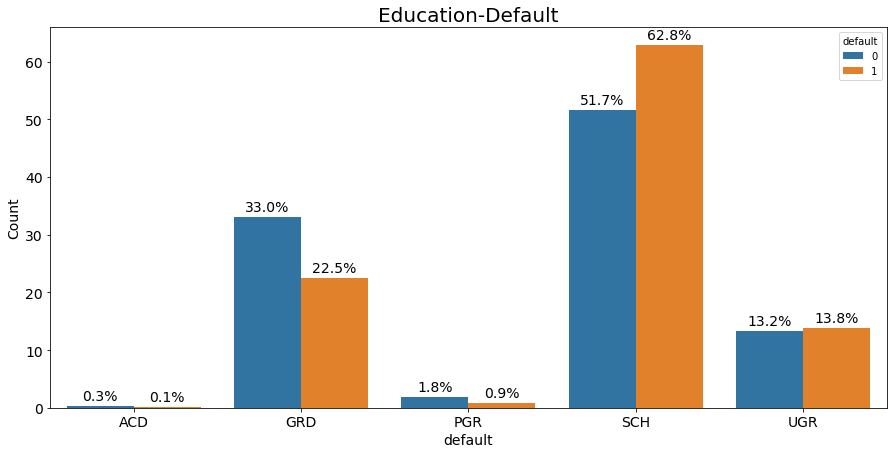

In [72]:
plt.figure(figsize = (15, 7))

educ_def = (df.groupby(['default'])['education']
            .value_counts(normalize = True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))


ax = sns.barplot(x = "education",y = "percentage", hue = "default", data = educ_def)


for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points',
                fontsize = 14)
    
    
plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);   

<AxesSubplot:>

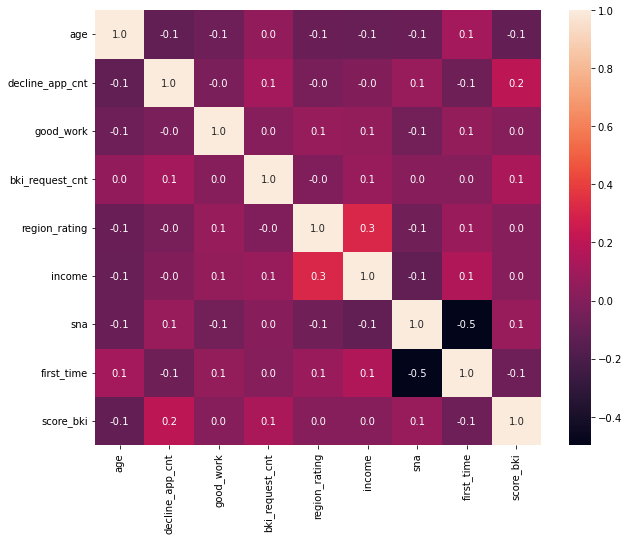

In [73]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt',
       'region_rating', 'income', 'sna', 'first_time', 'score_bki']


plt.figure(figsize = (10, 8))

sns.heatmap(df[num_cols].corr(method = 'spearman'),annot = True,fmt = ".1f")

(array([0.0e+00, 5.0e-06, 1.0e-05, 1.5e-05, 2.0e-05, 2.5e-05, 3.0e-05]),
 [Text(0, 0.0, '0.0'),
  Text(0, 4.9999999999999996e-06, '0.5'),
  Text(0, 9.999999999999999e-06, '1.0'),
  Text(0, 1.4999999999999999e-05, '1.5'),
  Text(0, 1.9999999999999998e-05, '2.0'),
  Text(0, 2.4999999999999998e-05, '2.5'),
  Text(0, 2.9999999999999997e-05, '3.0')])

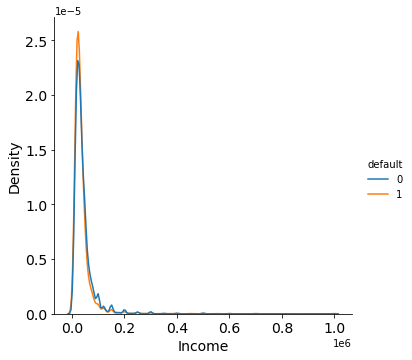

In [74]:
sns.displot(df,x = 'income',hue = 'default',kind = 'kde',common_norm = False)

plt.xlabel('Income',fontsize = 14)
plt.ylabel('Density',fontsize = 14)

plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

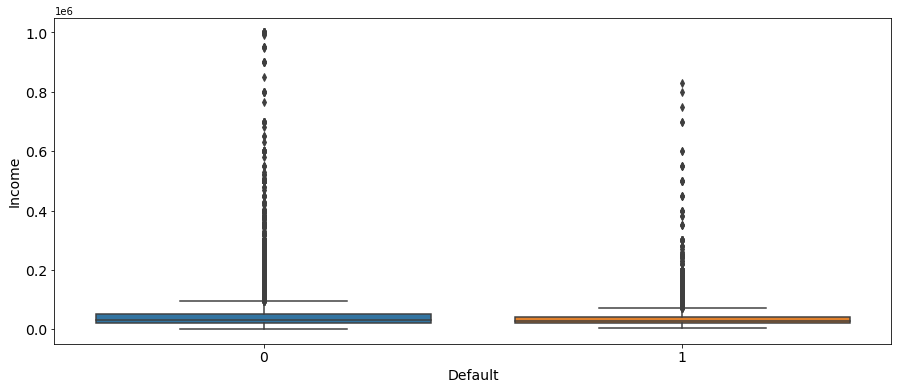

In [75]:
plt.figure(figsize = (15, 6))

sns.boxplot(x = 'default',y = 'income',data = df)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [76]:
df.groupby('default')['income'].mean()

default
0    41799.713288
1    36288.113316
Name: income, dtype: float64

In [77]:
df.groupby('default')['income'].median()

default
0    30000.0
1    28000.0
Name: income, dtype: float64

In [78]:
df_income = df.copy()
df_income.income = np.log(df.income + 1)

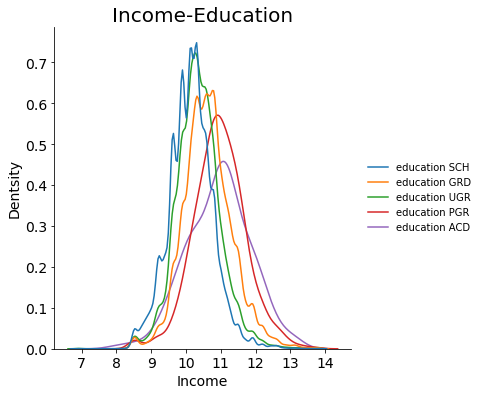

In [79]:
sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income,
    },
    kind="kde",
    common_norm=False
)

plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

In [80]:
df.columns

Index(['client_id', 'app_date', 'education', 'sex', 'age', 'car', 'car_type',
       'decline_app_cnt', 'good_work', 'score_bki', 'bki_request_cnt',
       'region_rating', 'home_address', 'work_address', 'income', 'sna',
       'first_time', 'foreign_passport', 'default'],
      dtype='object')

In [81]:
num_cols = ['age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'income', 'first_time','region_rating']

Text(0.5, 0.98, 'Histograms oof various features')

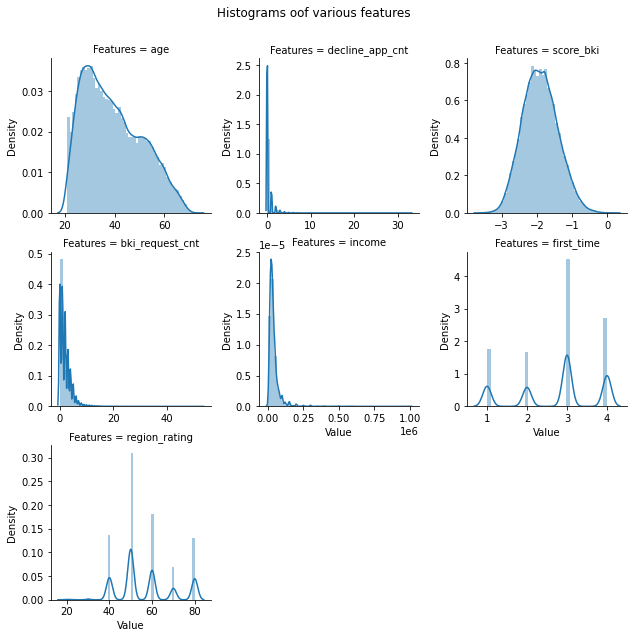

In [82]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top = 0.9)
plt.suptitle("Histograms oof various features")



In [83]:
for i in ['age','decline_app_cnt','bki_request_cnt','income']:
    df[i] = np.log(df[i] + 1)

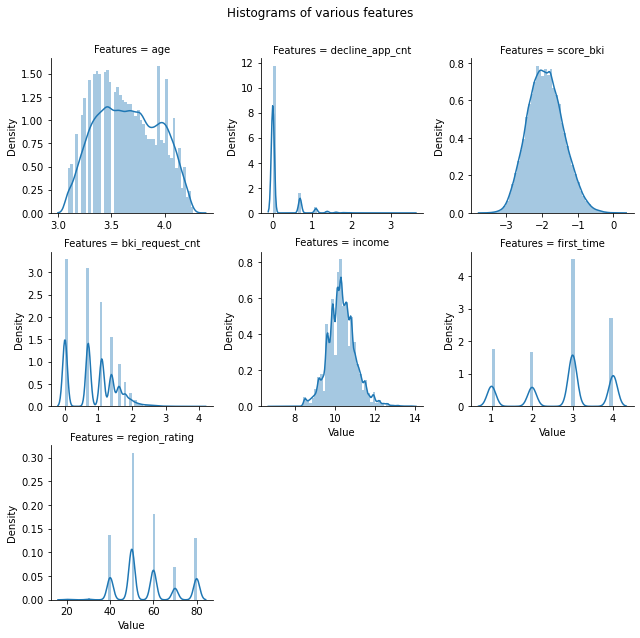

In [84]:
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [85]:
df['app_date'] = pd.to_datetime(df['app_date'], format='%d%b%Y')
df['month'] = df['app_date'].dt.month.astype(object)

df.drop(['app_date'],  axis=1, inplace=True)

In [86]:
mean_inc_reg = df.groupby('region_rating')['income'].median().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_inc_reg)

In [87]:
mean_inc_age = df.groupby('age')['income'].median().to_dict()
df['mean_income_age'] = df['age'].map(mean_inc_age)

In [88]:
mean_bki_age = df.groupby('age')['score_bki'].median().to_dict()
df['mean_bki_age'] = df['age'].map(mean_bki_age)

In [89]:
df[:5]

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,month,mean_income_region,mean_income_age,mean_bki_age
0,25905,SCH,M,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,...,2,9.798183,4,1,N,0,2,10.126671,9.903538,-1.981476
1,63161,SCH,F,4.094345,N,N,0.000000,0,-1.532276,1.386294,...,3,9.852247,4,1,N,0,3,10.126671,9.998843,-1.994864
2,25887,SCH,M,3.258097,Y,N,1.098612,0,-1.408142,0.693147,...,2,10.308986,1,4,Y,0,2,10.757924,10.308986,-1.814637
3,16222,SCH,F,3.988984,N,N,0.000000,0,-2.057471,1.098612,...,3,9.210440,1,3,N,0,1,10.126671,10.212803,-1.993905
4,101655,GRD,M,3.891820,N,N,0.000000,1,-1.244723,0.693147,...,3,10.308986,1,4,Y,0,4,10.308986,10.308986,-1.988764


In [90]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address',
       'foreign_passport', 'sna', 'month']

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           73799 non-null  int64  
 1   education           73799 non-null  object 
 2   sex                 73799 non-null  object 
 3   age                 73799 non-null  float64
 4   car                 73799 non-null  object 
 5   car_type            73799 non-null  object 
 6   decline_app_cnt     73799 non-null  float64
 7   good_work           73799 non-null  int64  
 8   score_bki           73799 non-null  float64
 9   bki_request_cnt     73799 non-null  float64
 10  region_rating       73799 non-null  int64  
 11  home_address        73799 non-null  object 
 12  work_address        73799 non-null  object 
 13  income              73799 non-null  float64
 14  sna                 73799 non-null  int64  
 15  first_time          73799 non-null  int64  
 16  fore

In [92]:
num_cols = list(df.dtypes[df.dtypes == float].index) + list(df.dtypes[df.dtypes == int].index)[1:-1]

In [93]:
num_cols

['age',
 'decline_app_cnt',
 'score_bki',
 'bki_request_cnt',
 'income',
 'mean_income_region',
 'mean_income_age',
 'mean_bki_age']

In [94]:
df_label = pd.get_dummies(df, columns=cat_cols,
                          drop_first=True).drop('client_id', axis=1)

In [95]:
df_label[:5]

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,mean_income_region,mean_income_age,...,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_2,month_3,month_4
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,10.126671,9.903538,...,0,1,0,0,0,0,1,1,0,0
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,10.126671,9.998843,...,0,0,1,0,0,0,1,0,1,0
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,10.757924,10.308986,...,0,1,0,1,0,0,0,1,0,0
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,10.126671,10.212803,...,0,0,1,0,0,0,0,0,0,0
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,10.308986,10.308986,...,0,0,1,1,0,0,0,0,0,1


In [96]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=RAND)

In [97]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

In [98]:
print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))

roc-auc: 0.7292401505817596
precision: 0.23087308730873088
recall: 0.6568501920614597
f1: 0.34165834165834164
logloss: 11.103175194267743


In [99]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

In [100]:
metrics

,Baseline_LR
roc-auc,0.729240
precision,0.230873
recall,0.656850
f1,0.341658
logloss,11.103175


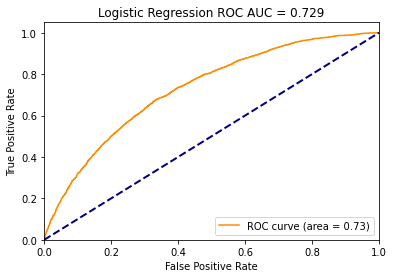

In [101]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [102]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)

In [103]:
%%time
#grid_cv.fit(X_train, y_train)

Wall time: 0 ns


In [104]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

In [105]:
best_params = {'C': 500.5, 
               'l1_ratio': 0.25,
               'max_iter': 400, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [106]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

In [107]:
print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.7298975923946084
precision: 0.23161377650774553
recall: 0.6572769953051644
f1: 0.34252669039145905
logloss: 11.067606026557335


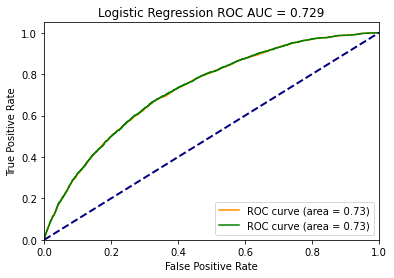

In [108]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [109]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]

In [110]:
metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR
roc-auc,0.729240,0.729898
precision,0.230873,0.231614
recall,0.656850,0.657277
f1,0.341658,0.342527


In [111]:
import shap

In [112]:
explainer = shap.LinearExplainer(lr_gr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

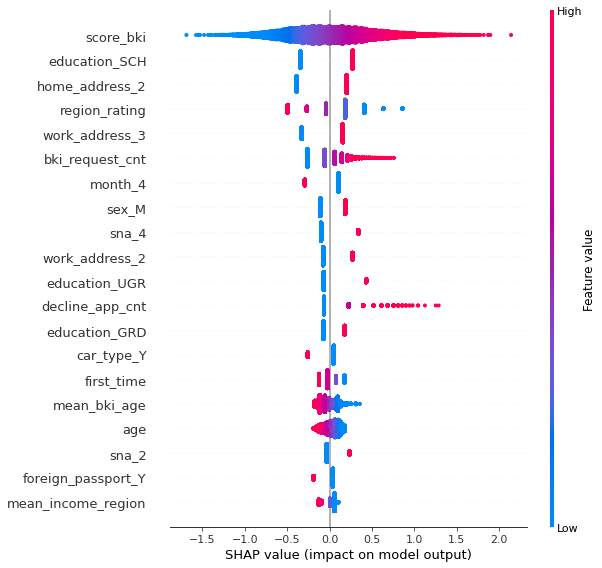

In [113]:
shap.summary_plot(shap_values, X_test)

In [114]:
lr_gr.coef_

array([[-0.31142898,  0.42003637,  1.00807691,  0.29122857, -0.02253508,
        -0.03301238, -0.10011844, -0.29114687,  0.3278271 , -1.35083925,
         0.24996226,  0.15193617,  0.62047109,  0.50051045,  0.2931701 ,
         0.01053577, -0.30481394, -0.2109511 ,  0.59093546,  0.11117165,
         0.34733302,  0.48287661, -0.22811917,  0.26751941,  0.19071974,
         0.437719  , -0.0374509 , -0.0751807 , -0.39348823]])

In [115]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by = 'imp',ascending = False)

In [116]:
feature_imp

,feature,imp
2,score_bki,1.008077
12,education_SCH,0.620471
18,home_address_2,0.590935
13,education_UGR,0.500510
21,work_address_3,0.482877
25,sna_4,0.437719
1,decline_app_cnt,0.420036
20,work_address_2,0.347333
8,mean_income_age,0.327827
14,sex_M,0.293170


In [117]:
df_label.groupby('default')[['score_bki']].median()

,score_bki
default,
0,-1.956982
1,-1.683857


In [118]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [119]:
cols_show = list(set(feature_importance.col_name[:15]) & set(num_cols))

In [120]:
cols_show

['score_bki', 'decline_app_cnt', 'bki_request_cnt']

In [121]:
df_label[cols_show + ['default']].groupby('default')[cols_show].mean().T

default,0,1
score_bki,-1.938048,-1.675637
decline_app_cnt,0.135281,0.270484
bki_request_cnt,0.858317,1.013421
